In [1]:
import numpy as np
import pandas as pd
import csv
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re

# data load, preprocessing
data = pd.read_csv('./dataset.txt', sep = ",", quoting=csv.QUOTE_NONE, encoding='utf-8')
texts = data['text_column']
labels = data['label_column']


ModuleNotFoundError: No module named 'numpy'

In [49]:
from konlpy.tag import Okt

# 한국어 전처리 함수 정의
def preprocess_korean_text(text):
    # 한국어 형태소 분석기 (KoNLPy)를 사용하여 토큰화
    okt = Okt()
    words = okt.morphs(text, stem=True)
    text = ' '.join(words)
    
    # 특수 문자, 숫자, 공백 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    text = ' '.join(text.split())  # 중복 공백 제거
    
    # 불용어 제거
    stopwords = ['을', '를', '이', '가', '은', '는', '에서', '에게', '에', '로', '으로', '도', '한', '그', '고', '와', '듯', '듯이', '만', '밖에']
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    text = ' '.join(tokens)

    return text

# 텍스트 열에 전처리 함수 적용
texts = texts.apply(preprocess_korean_text)

In [50]:
print("amount of datas : " + str(texts.count()))

amount_of_food = 0
amount_of_it = 0
amount_of_school = 0
amount_of_sports = 0

for i in labels:
    if i == 0:
        amount_of_food += 1
    elif i == 1:
        amount_of_it += 1
    elif i == 2:
        amount_of_school += 1
    elif i == 3:
        amount_of_sports += 1

print("food_data : " + str(amount_of_food) + "\nit_data : " + str(amount_of_it) + "\nschool_data : " + str(amount_of_school) + "\nsports_data : " + str(amount_of_sports))

amount of datas : 9460
food_data : 3150
it_data : 1786
school_data : 2810
sports_data : 1714


In [51]:
print(texts[0])

가끔 레스토랑 파스타 주문 하다 먹다


In [53]:
# 한글 텍스트 형태소 분석
from konlpy.tag import Okt
okt = Okt()
texts = texts.apply(lambda x: ' '.join(okt.morphs(x)))

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50)

In [54]:
print(texts[560])

떡볶이 치즈 얹다 더 맛있다


In [55]:
print(labels)

0       0
1       0
2       0
3       0
4       0
       ..
9455    3
9456    3
9457    3
9458    3
9459    3
Name: label_column, Length: 9460, dtype: int64


In [56]:
import numpy as np

# NaN 또는 무한대 값을 가지는 인덱스 검사
nan_indices = np.where(np.isnan(labels))
inf_indices = np.where(np.isinf(labels))

print("NaN 값을 가지는 인덱스:", nan_indices)
print("무한대 값을 가지는 인덱스:", inf_indices)


NaN 값을 가지는 인덱스: (array([], dtype=int64),)
무한대 값을 가지는 인덱스: (array([], dtype=int64),)


In [57]:
# multiclass label prepare
from keras.utils import to_categorical

mean_value = labels.mean()
labels.fillna(mean_value, inplace=True)

# labels 배열을 정수로 변환
labels = labels.astype(int)
y = to_categorical(labels, num_classes=4)  # amount of class

In [58]:
print(texts)

0                  가끔 레스토랑 파스타 주문 하다 먹다
1               가끔 팝콘 과 함께 영화 보다 걸 좋아하다
2       가장 기억 남다 가족 식사 나 친구 와의 모임 언제 이다
3           가장 기억 남다 디저트 경험 공유 해주다 수 있다
4                  가장 기억 남다 아침 식사 무엇 이다
                     ...               
9455                          휴식일 계획 하다
9456       휴일 에는 가족 과 함께 야구 즐기다 것 일상 이다
9457    휴일 에는 가족 과 함께 자전거 타다 즐겁다 시간 보내다
9458     휴일 에는 자전거 타고 자연 속 탐험 하다 것 좋아하다
9459                     운동 멘탈 힘 키우다 줍다
Name: text_column, Length: 9460, dtype: object


Epoch 1/20
61/61 [==============================] - 3s 20ms/step - loss: 1.2599 - accuracy: 0.4387 - val_loss: 1.1008 - val_accuracy: 0.7153
Epoch 2/20
61/61 [==============================] - 1s 14ms/step - loss: 0.9244 - accuracy: 0.7863 - val_loss: 0.7412 - val_accuracy: 0.8567
Epoch 3/20
61/61 [==============================] - 1s 14ms/step - loss: 0.5886 - accuracy: 0.8969 - val_loss: 0.4593 - val_accuracy: 0.9194
Epoch 4/20
61/61 [==============================] - 1s 14ms/step - loss: 0.3740 - accuracy: 0.9495 - val_loss: 0.3112 - val_accuracy: 0.9590
Epoch 5/20
61/61 [==============================] - 1s 15ms/step - loss: 0.2603 - accuracy: 0.9732 - val_loss: 0.2328 - val_accuracy: 0.9703
Epoch 6/20
61/61 [==============================] - 1s 15ms/step - loss: 0.1932 - accuracy: 0.9795 - val_loss: 0.1850 - val_accuracy: 0.9709
Epoch 7/20
61/61 [==============================] - 1s 15ms/step - loss: 0.1512 - accuracy: 0.9841 - val_loss: 0.1584 - val_accuracy: 0.9736
Epoch 8/20
61

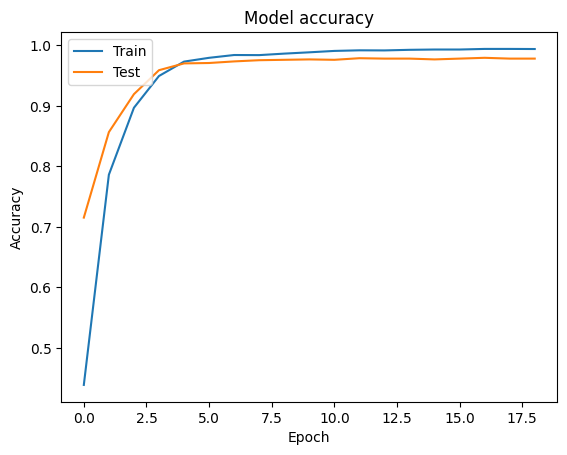

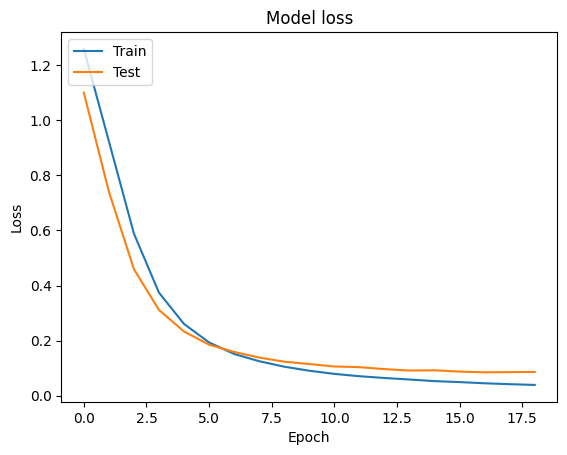

60/60 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.9799
Loss: 0.07159682363271713, Accuracy: 0.97991544008255
학습된 모델이 저장되었습니다.


c:\Users\dargu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
# data divising
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model structure
model = Sequential()
model.add(Embedding(input_dim=500, output_dim=64, input_length=50))
model.add(LSTM(4))
model.add(Dense(4, activation='softmax'))  # print softmax of 4 class

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience = 2) # protect overfitting

history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2, verbose=1, callbacks = [early_stopping])
print(history.history)

# training visualizing (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#training visualizing (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# model save
model.save('./recog_situation_model.h5')
print("학습된 모델이 저장되었습니다.")

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 64)            32000     
                                                                 
 lstm_5 (LSTM)               (None, 4)                 1104      
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 33124 (129.39 KB)
Trainable params: 33124 (129.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
